In [20]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ca_demographics_data_df = pd.DataFrame(pd.read_csv("../../Resources/Clean/ca_county_demographic_data-20210804.csv", dtype={"FIPS Code": object}))
ca_demographics_data_df.head()

,FIPS Code,County,Cumulative Cases (2020-02-01 - 2021-31-07),Cumulative Deaths (2020-02-01 - 2021-31-07),Cumulative Deaths /Cases (calculated by EK),Cases per capita (calculated by EK),Deaths per capita (calculated by EK),Total Population,Population density (people per sq. mile):\t,Pop % Less Than 18 Years of Age,...,# Uninsured (Adults),% Uninsured (Adults),% Uninsured (Adults) Error Margin,# Uninsured (Children),% Uninsured (Children),% Uninsured (Children) Error Margin,% Frequent Mental Distress,% Frequent Mental Distress Error Margin,% Frequent Physical Distress,% Frequent Physical Distress Error Margin
0,06001,Alameda,96932,1270,0.013102,0.057997,0.000760,"1,671,329","2,266.8\t",20.3,...,"63,772",6,5-6%,"8,207",2,2-3%,11,10-12%,11,10-11%
1,06003,Alpine,91,0,0.000000,0.080602,0.000000,"1,129",1.53,17.7,...,49,8,6-9%,9,4,3-5%,16,14-17%,15,14-17%
2,06005,Amador,3925,48,0.012229,0.098737,0.001207,"39,752",66.86,15.1,...,"1,315",7,6-8%,196,3,2-4%,14,13-15%,13,12-14%
3,06007,Butte,13433,204,0.015186,0.061286,0.000931,"219,186",133.94,20.3,...,"12,789",9,8-11%,"1,502",3,2-4%,15,14-16%,14,13-16%
4,06009,Calaveras,2344,57,0.024317,0.051062,0.001242,"45,905",45,17.1,...,"2,162",9,7-10%,288,4,3-5%,14,13-16%,13,12-14%


In [3]:
los_angeles_stats_df = pd.DataFrame(ca_demographics_data_df.iloc[18])
los_angeles_stats_df

,18
FIPS Code,06037
County,Los Angeles
Cumulative Cases (2020-02-01 - 2021-31-07),1260502
Cumulative Deaths (2020-02-01 - 2021-31-07),24703
Cumulative Deaths /Cases (calculated by EK),0.019598
Cases per capita (calculated by EK),0.125559
Deaths per capita (calculated by EK),0.002461
Total Population,"10,039,107"
Population density (people per sq. mile):\t,"2,473.51"
Pop % Less Than 18 Years of Age,21.4


In [4]:
ca_case_surveillance_clean_df = pd.DataFrame(pd.read_csv("../../Resources/Clean/ca_data_df.csv", dtype={"FIPS Code": object}))
ca_case_surveillance_clean_df.head()

,year,month,case_month,res_county,res_state,county_fips_code,age_group,sex,race/ethnicity,current_status,death_yn
0,2020,12,2020-12,CONTRA COSTA,CA,6013.0,0 - 17 years,Female,Hispanic/Latino,Laboratory-confirmed case,No
1,2021,3,2021-03,KERN,CA,6029.0,0 - 17 years,Female,Hispanic/Latino,Laboratory-confirmed case,No
2,2021,1,2021-01,EL DORADO,CA,6017.0,0 - 17 years,Male,Multiple/Other,Laboratory-confirmed case,No
3,2020,11,2020-11,SHASTA,CA,6089.0,18 to 49 years,Male,Multiple/Other,Laboratory-confirmed case,No
4,2021,1,2021-01,ORANGE,CA,12095.0,65+ years,Female,Black,Laboratory-confirmed case,No


## Calculating COVID-19 case and death statistics in Los Angeles County

In [5]:
# Isolate rows pertaining to Los Angles County
los_angeles_case_surveillance_df = pd.DataFrame(ca_case_surveillance_clean_df.loc[ca_case_surveillance_clean_df["res_county"] == "LOS ANGELES"])

# Find the number of COVID-19 cases in Los Angeles County
cases_los_angeles = los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths in Los Angeles County
deaths_los_angeles = los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Find the number of COVID-19 deaths each month in Los Angeles County
los_angeles_deaths_by_month_df = pd.DataFrame(los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "la_deaths"
los_angeles_deaths_by_month_df = los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "la_deaths"})

# Calculate cumulative COVID-19 deaths each month in Los Angeles County
los_angeles_deaths_by_month_series = los_angeles_deaths_by_month_df["la_deaths"]

cumulative_los_angeles_deaths = [los_angeles_deaths_by_month_series.iloc[0]]
current_month_cumulative_la_deaths = los_angeles_deaths_by_month_series.iloc[0]

for idx in range(len(los_angeles_deaths_by_month_df)-1):
    current_month_cumulative_la_deaths = current_month_cumulative_la_deaths + los_angeles_deaths_by_month_series[idx+1]
    cumulative_los_angeles_deaths.append(current_month_cumulative_la_deaths)

# Add monthly cumulative deaths to Los Angeles County deaths dataframe
los_angeles_deaths_by_month_df["cumulative_los_angeles_deaths"] = cumulative_los_angeles_deaths

# Print total Los Angles County cases and deaths
print(f"Reported Los Angeles Cases: {cases_los_angeles} | Reported Los Angeles deaths: {deaths_los_angeles}")

# Show Los Angeles County deaths dataframe
los_angeles_deaths_by_month_df


Reported Los Angeles Cases: 1211222 | Reported Los Angeles deaths: 23152


,la_deaths,cumulative_los_angeles_deaths
case_month,,
2020-03,381,381
2020-04,1680,2061
2020-05,1195,3256
2020-06,1076,4332
2020-07,1300,5632
2020-08,715,6347
2020-09,381,6728
2020-10,418,7146
2020-11,1728,8874


In [45]:
# Find index label for last row of dataframe
last_row = los_angeles_deaths_by_month_df.index.to_list()[-1]

In [6]:
los_angeles_case_surveillance_df[["current_status", "race/ethnicity"]].groupby(by="race/ethnicity").count()

,current_status
race/ethnicity,
American Indian/Alaska Native,4599
Asian,60200
Black,54357
Hispanic/Latino,245147
Multiple/Other,56202
Native Hawaiian/Other Pacific Islander,5079
Non-Hispanic/Latino,15199
Unknown,641032
White,129407


## Calculating case and death statistics for American Indian & Alaska Native COVID-19 patients in Los Angeles County

In [35]:
# Isolate rows pertaining to cases of AIAN COVID-19 patients Los Angles County
aian_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "American Indian/Alaska Native"])

# Find the number of COVID-19 cases for AIAN patients in Los Angeles County
aian_los_angeles_cases = aian_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for AIAN patients in Los Angeles County
aian_los_angeles_deaths = aian_los_angeles_case_surveillance_df.loc[aian_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Calculate cumulative COVID-19 deaths each month for AIAN patients in Los Angeles County
aian_los_angeles_deaths_by_month_df = pd.DataFrame(aian_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[aian_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "aian_la_deaths"
aian_los_angeles_deaths_by_month_df = aian_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "aian_la_deaths"})

# Calculate cumulative COVID-19 deaths of AIAN patients each month in Los Angeles County
aian_los_angeles_deaths_by_month_series = aian_los_angeles_deaths_by_month_df["aian_la_deaths"]

try:
    cumulative_aian_los_angeles_deaths = [aian_los_angeles_deaths_by_month_series.iloc[0]]
    current_month_cumulative_aian_deaths = aian_los_angeles_deaths_by_month_series.iloc[0]

    for idx in range(len(aian_los_angeles_deaths_by_month_series)-1):
        current_month_cumulative_aian_deaths = current_month_cumulative_aian_deaths + aian_los_angeles_deaths_by_month_series[idx+1]
        cumulative_aian_los_angeles_deaths.append(current_month_cumulative_aian_deaths)

    # Add monthly cumulative deaths of AIAN patients to Los Angeles County aian patient deaths dataframe
    aian_los_angeles_deaths_by_month_df["cumulative_aian_la_deaths"] = cumulative_aian_los_angeles_deaths
except:
    aian_los_angeles_deaths_by_month_df = pd.DataFrame(aian_los_angeles_case_surveillance_df[["case_month","current_status"]]
                                                 .groupby(by="case_month").count())
    aian_los_angeles_deaths_by_month_df["aian_la_deaths"] = np.nan
    aian_los_angeles_deaths_by_month_df["cumulative_aian_la_deaths"] = np.nan
    aian_los_angeles_deaths_by_month_df = pd.DataFrame(aian_los_angeles_deaths_by_month_df.fillna(value=0))
    aian_los_angeles_deaths_by_month_df = pd.DataFrame(aian_los_angeles_deaths_by_month_df.drop(columns="current_status"))
    
# Print total Los Angles County cases and deaths for AIAN patients
print(f"Reported American Indian & Alaska Native Los Angeles Cases: {aian_los_angeles_cases} | Reported American Indian & Alaska Native Los Angeles deaths: {aian_los_angeles_deaths}")

# Display Los Angeles County AIAN patient deaths dataframe
aian_los_angeles_deaths_by_month_df

Reported American Indian & Alaska Native Los Angeles Cases: 4599 | Reported American Indian & Alaska Native Los Angeles deaths: 0


,aian_la_deaths,cumulative_aian_la_deaths
case_month,,
2020-05,0.0,0.0
2020-06,0.0,0.0
2020-07,0.0,0.0
2020-08,0.0,0.0
2020-09,0.0,0.0
2020-10,0.0,0.0
2020-11,0.0,0.0
2020-12,0.0,0.0
2021-01,0.0,0.0


## Merge dataframes: Los Angeles County deaths, Los Angeles County American Indian & Alaska Native patient deaths

In [55]:
# Merge Los Angeles County deaths and Los Angeles County AIAN patient deaths dataframes
los_angeles_and_aian_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=aian_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Make dates uniform across dataframes
los_angeles_and_aian_deaths_df = pd.DataFrame(los_angeles_and_aian_deaths_df.truncate(after=last_row))

# Fill NaN values for cumulative AIAN patient deaths
los_angeles_and_aian_deaths_df["cumulative_aian_la_deaths"].fillna(method='ffill', inplace=True)

# Calculate the percentage of Los Angeles County deaths were AIAN patients
cumulative_los_angeles_deaths_series = los_angeles_and_aian_deaths_df["cumulative_los_angeles_deaths"]
cumulative_aian_la_deaths_series = los_angeles_and_aian_deaths_df["cumulative_aian_la_deaths"]
percentage_deaths_aian_los_angeles = round((cumulative_aian_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of AIAN patient deaths to dataframe
los_angeles_and_aian_deaths_df["percentage_deaths_aian"] = percentage_deaths_aian_los_angeles

# Fill NaN values with 0
los_angeles_and_aian_deaths_df = pd.DataFrame(los_angeles_and_aian_deaths_df.fillna(value=0))

# Display dataframe
los_angeles_and_aian_deaths_df

,la_deaths,cumulative_los_angeles_deaths,aian_la_deaths,cumulative_aian_la_deaths,percentage_deaths_aian
case_month,,,,,
2020-03,381.0,381.0,0.0,0.0,0.0
2020-04,1680.0,2061.0,0.0,0.0,0.0
2020-05,1195.0,3256.0,0.0,0.0,0.0
2020-06,1076.0,4332.0,0.0,0.0,0.0
2020-07,1300.0,5632.0,0.0,0.0,0.0
2020-08,715.0,6347.0,0.0,0.0,0.0
2020-09,381.0,6728.0,0.0,0.0,0.0
2020-10,418.0,7146.0,0.0,0.0,0.0
2020-11,1728.0,8874.0,0.0,0.0,0.0


## Calculating case and death statistics for Asian COVID-19 patients in Los Angeles County

In [9]:
# Isolate rows pertaining to cases of Asian COVID-19 patients Los Angles County
asian_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "Asian"])

# Find the number of COVID-19 cases for Asian patients in Los Angeles County
asian_los_angeles_cases = asian_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for Asian patients in Los Angeles County
asian_los_angeles_deaths = asian_los_angeles_case_surveillance_df.loc[asian_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Calculate cumulative COVID-19 deaths each month for Asian patients in Los Angeles County
asian_los_angeles_deaths_by_month_df = pd.DataFrame(asian_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[asian_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "asian_la_deaths"
asian_los_angeles_deaths_by_month_df = asian_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "asian_la_deaths"})

# Calculate cumulative COVID-19 deaths of Asian patients each month in Los Angeles County
asian_los_angeles_deaths_by_month_series = asian_los_angeles_deaths_by_month_df["asian_la_deaths"]

cumulative_asian_los_angeles_deaths = [asian_los_angeles_deaths_by_month_series.iloc[0]]
current_month_cumulative_asian_deaths = asian_los_angeles_deaths_by_month_series.iloc[0]

for idx in range(len(asian_los_angeles_deaths_by_month_series)-1):
    current_month_cumulative_asian_deaths = current_month_cumulative_asian_deaths + asian_los_angeles_deaths_by_month_series[idx+1]
    cumulative_asian_los_angeles_deaths.append(current_month_cumulative_asian_deaths)

# Add monthly cumulative deaths of Asian patients to Los Angeles County Asian patient deaths dataframe
asian_los_angeles_deaths_by_month_df["cumulative_asian_la_deaths"] = cumulative_asian_los_angeles_deaths

# Print total Los Angles County cases and deaths for Asian patients
print(f"Asian Los Angeles Cases: {asian_los_angeles_cases} | Asian Los Angeles deaths: {asian_los_angeles_deaths}")

# Display Los Angeles County Asian patient deaths dataframe
asian_los_angeles_deaths_by_month_df

Reported Asian Los Angeles Cases: 60200 | Reported Asian Los Angeles deaths: 3163


,asian_la_deaths,cumulative_asian_la_deaths
case_month,,
2020-03,57,57
2020-04,304,361
2020-05,169,530
2020-06,92,622
2020-07,168,790
2020-08,112,902
2020-09,42,944
2020-10,47,991
2020-11,209,1200


## Merge dataframes: Los Angeles County deaths, Los Angeles County Asian patient deaths

In [13]:
# Merge Los Angeles County deaths and Los Angeles County Asian patient deaths dataframes
los_angeles_and_asian_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=asian_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Fill NaN values for cumulative Asian patient deaths
los_angeles_and_asian_deaths_df["cumulative_asian_la_deaths"].fillna(method='ffill', inplace=True)

# Calculate the percentage of Los Angeles County deaths were Asian patients
cumulative_los_angeles_deaths_series = los_angeles_and_asian_deaths_df["cumulative_los_angeles_deaths"]
cumulative_asian_la_deaths_series = los_angeles_and_asian_deaths_df["cumulative_asian_la_deaths"]
percentage_deaths_asian_los_angeles = round((cumulative_asian_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of Asian patient deaths to dataframe
los_angeles_and_asian_deaths_df["percentage_deaths_asian"] = percentage_deaths_asian_los_angeles

# Display dataframe
los_angeles_and_asian_deaths_df

,la_deaths,cumulative_los_angeles_deaths,asian_la_deaths,cumulative_asian_la_deaths,percentage_deaths_asian
case_month,,,,,
2020-03,381,381,57.0,57.0,14.96
2020-04,1680,2061,304.0,361.0,17.52
2020-05,1195,3256,169.0,530.0,16.28
2020-06,1076,4332,92.0,622.0,14.36
2020-07,1300,5632,168.0,790.0,14.03
2020-08,715,6347,112.0,902.0,14.21
2020-09,381,6728,42.0,944.0,14.03
2020-10,418,7146,47.0,991.0,13.87
2020-11,1728,8874,209.0,1200.0,13.52


## Calculating case and death statistics for Black COVID-19 patients in Los Angeles County

In [48]:
# Isolate rows pertaining to cases of Black COVID-19 patients Los Angles County
black_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "Black"])

# Find the number of COVID-19 cases for Black patients in Los Angeles County
black_los_angeles_cases = black_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for Black patients in Los Angeles County
black_los_angeles_deaths = black_los_angeles_case_surveillance_df.loc[black_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]


# Calculate cumulative COVID-19 deaths each month for Black patients in Los Angeles County
black_los_angeles_deaths_by_month_df = pd.DataFrame(black_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[black_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "black_la_deaths"
black_los_angeles_deaths_by_month_df = black_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "black_la_deaths"})


# Calculate cumulative COVID-19 deaths of Black patients each month in Los Angeles County
black_los_angeles_deaths_by_month_series = black_los_angeles_deaths_by_month_df["black_la_deaths"]

cumulative_black_los_angeles_deaths = [black_los_angeles_deaths_by_month_series.iloc[0]]
current_month_cumulative_deaths = black_los_angeles_deaths_by_month_series.iloc[0]

for idx in range(len(black_los_angeles_deaths_by_month_series)-1):
    current_month_cumulative_deaths = current_month_cumulative_deaths + black_los_angeles_deaths_by_month_series[idx+1]
    cumulative_black_los_angeles_deaths.append(current_month_cumulative_deaths)

# Add monthly cumulative deaths of Black patients to Los Angeles County Black patient deaths dataframe
black_los_angeles_deaths_by_month_df["cumulative_black_la_deaths"] = cumulative_black_los_angeles_deaths

# Print total Los Angles County cases and deaths for Black patients
print(f"Black Los Angeles Cases: {black_los_angeles_cases} | Black Los Angeles deaths: {black_los_angeles_deaths}")

# Show Los Angeles County Black patient deaths dataframe
black_los_angeles_deaths_by_month_df

Reported Black Los Angeles Cases: 54357 | Reported Black Los Angeles deaths: 1829


,black_la_deaths,cumulative_black_la_deaths
case_month,,
2020-03,52,52
2020-04,199,251
2020-05,147,398
2020-06,75,473
2020-07,94,567
2020-08,43,610
2020-11,130,740
2020-12,606,1346
2021-01,428,1774


## Merge dataframes: Los Angeles County deaths, Los Angeles County Black patient deaths

In [49]:
# Merge Los Angeles County deaths and Los Angeles County Black patient deaths dataframes
los_angeles_and_black_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=black_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Fill NaN values for cumulative Black patient deaths
los_angeles_and_black_deaths_df["cumulative_black_la_deaths"].fillna(method='ffill', inplace=True)

# Calculate the percentage of Los Angeles County deaths were Black patients
cumulative_los_angeles_deaths_series = los_angeles_and_black_deaths_df["cumulative_los_angeles_deaths"]
cumulative_black_la_deaths_series = los_angeles_and_black_deaths_df["cumulative_black_la_deaths"]
percentage_deaths_black_los_angeles = round((cumulative_black_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of Black patient deaths to dataframe
los_angeles_and_black_deaths_df["percentage_deaths_black"] = percentage_deaths_black_los_angeles

# Display dataframe
los_angeles_and_black_deaths_df

,la_deaths,cumulative_los_angeles_deaths,black_la_deaths,cumulative_black_la_deaths,percentage_deaths_black
case_month,,,,,
2020-03,381,381,52.0,52.0,13.65
2020-04,1680,2061,199.0,251.0,12.18
2020-05,1195,3256,147.0,398.0,12.22
2020-06,1076,4332,75.0,473.0,10.92
2020-07,1300,5632,94.0,567.0,10.07
2020-08,715,6347,43.0,610.0,9.61
2020-09,381,6728,NaN,610.0,9.07
2020-10,418,7146,NaN,610.0,8.54
2020-11,1728,8874,130.0,740.0,8.34


## Calculating case and death statistics for Hispanic/Latino COVID-19 patients in Los Angeles County

## Merge dataframes: Los Angeles County deaths, Los Angeles County Hispanic/Latino patient deaths

## Calculating case and death statistics for Native Hawaiian/Other Pacific Islander COVID-19 patients in Los Angeles County

In [59]:
# Isolate rows pertaining to cases of NHOPI COVID-19 patients Los Angles County
nhopi_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "American Indian/Alaska Native"])

# Find the number of COVID-19 cases for NHOPI patients in Los Angeles County
nhopi_los_angeles_cases = nhopi_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for NHOPI patients in Los Angeles County
nhopi_los_angeles_deaths = nhopi_los_angeles_case_surveillance_df.loc[nhopi_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Calculate cumulative COVID-19 deaths each month for NHOPI patients in Los Angeles County
nhopi_los_angeles_deaths_by_month_df = pd.DataFrame(nhopi_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[nhopi_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "nhopi_la_deaths"
nhopi_los_angeles_deaths_by_month_df = nhopi_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "nhopi_la_deaths"})

# Calculate cumulative COVID-19 deaths of NHOPI patients each month in Los Angeles County
nhopi_los_angeles_deaths_by_month_series = nhopi_los_angeles_deaths_by_month_df["nhopi_la_deaths"]

try:
    cumulative_nhopi_los_angeles_deaths = [nhopi_los_angeles_deaths_by_month_series.iloc[0]]
    current_month_cumulative_nhopi_deaths = nhopi_los_angeles_deaths_by_month_series.iloc[0]

    for idx in range(len(nhopi_los_angeles_deaths_by_month_series)-1):
        current_month_cumulative_nhopi_deaths = current_month_cumulative_nhopi_deaths + nhopi_los_angeles_deaths_by_month_series[idx+1]
        cumulative_nhopi_los_angeles_deaths.append(current_month_cumulative_nhopi_deaths)

    # Add monthly cumulative deaths of NHOPI patients to Los Angeles County nhopi patient deaths dataframe
    nhopi_los_angeles_deaths_by_month_df["cumulative_nhopi_la_deaths"] = cumulative_nhopi_los_angeles_deaths
except:
    nhopi_los_angeles_deaths_by_month_df = pd.DataFrame(nhopi_los_angeles_case_surveillance_df[["case_month","current_status"]]
                                                 .groupby(by="case_month").count())
    nhopi_los_angeles_deaths_by_month_df["nhopi_la_deaths"] = np.nan
    nhopi_los_angeles_deaths_by_month_df["cumulative_nhopi_la_deaths"] = np.nan
    nhopi_los_angeles_deaths_by_month_df = pd.DataFrame(nhopi_los_angeles_deaths_by_month_df.fillna(value=0))
    nhopi_los_angeles_deaths_by_month_df = pd.DataFrame(nhopi_los_angeles_deaths_by_month_df.drop(columns="current_status"))
    
# Print total Los Angles County cases and deaths for NHOPI patients
print(f"Native Hawaiian/Other Pacific Islander Los Angeles Cases: {nhopi_los_angeles_cases} | Native Hawaiian/Other Pacific Islander Los Angeles deaths: {nhopi_los_angeles_deaths}")

# Display Los Angeles County NHOPI patient deaths dataframe
nhopi_los_angeles_deaths_by_month_df

Native Hawaiian/Other Pacific Islander Los Angeles Cases: 4599 | Native Hawaiian/Other Pacific Islander Los Angeles deaths: 0


,nhopi_la_deaths,cumulative_nhopi_la_deaths
case_month,,
2020-05,0.0,0.0
2020-06,0.0,0.0
2020-07,0.0,0.0
2020-08,0.0,0.0
2020-09,0.0,0.0
2020-10,0.0,0.0
2020-11,0.0,0.0
2020-12,0.0,0.0
2021-01,0.0,0.0


## Merge dataframes: Los Angeles County deaths, Los Angeles County Native Hawaiian/Other Pacific Islander patient deaths

In [60]:
# Merge Los Angeles County deaths and Los Angeles County NHOPI patient deaths dataframes
los_angeles_and_nhopi_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=nhopi_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Make dates uniform across dataframes
los_angeles_and_nhopi_deaths_df = pd.DataFrame(los_angeles_and_nhopi_deaths_df.truncate(after=last_row))

# Fill NaN values for cumulative NHOPI patient deaths
los_angeles_and_nhopi_deaths_df["cumulative_nhopi_la_deaths"].fillna(method='ffill', inplace=True)

# Calculate the percentage of Los Angeles County deaths were NHOPI patients
cumulative_los_angeles_deaths_series = los_angeles_and_nhopi_deaths_df["cumulative_los_angeles_deaths"]
cumulative_nhopi_la_deaths_series = los_angeles_and_nhopi_deaths_df["cumulative_nhopi_la_deaths"]
percentage_deaths_nhopi_los_angeles = round((cumulative_nhopi_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of NHOPI patient deaths to dataframe
los_angeles_and_nhopi_deaths_df["percentage_deaths_nhopi"] = percentage_deaths_nhopi_los_angeles

# Fill NaN values with 0
los_angeles_and_nhopi_deaths_df = pd.DataFrame(los_angeles_and_nhopi_deaths_df.fillna(value=0))

# Display dataframe
los_angeles_and_nhopi_deaths_df

,la_deaths,cumulative_los_angeles_deaths,nhopi_la_deaths,cumulative_nhopi_la_deaths,percentage_deaths_nhopi
case_month,,,,,
2020-03,381.0,381.0,0.0,0.0,0.0
2020-04,1680.0,2061.0,0.0,0.0,0.0
2020-05,1195.0,3256.0,0.0,0.0,0.0
2020-06,1076.0,4332.0,0.0,0.0,0.0
2020-07,1300.0,5632.0,0.0,0.0,0.0
2020-08,715.0,6347.0,0.0,0.0,0.0
2020-09,381.0,6728.0,0.0,0.0,0.0
2020-10,418.0,7146.0,0.0,0.0,0.0
2020-11,1728.0,8874.0,0.0,0.0,0.0


## Calculating case and death statistics for White COVID-19 patients in Los Angeles County

## Merge dataframes: Los Angeles County deaths, Los Angeles County White patient deaths

## Plot percetage of COVID-19 deaths over time for a given race/ethnicity against % population of said race/ethnicity

In [52]:
# Set variable for months tracked for x-axis
months = los_angeles_deaths_by_month_df.index.tolist()

# Set variables for population percentage of each race/ethnicity
la_percent_aian = los_angeles_stats_df.loc["Pop % American Indian & Alaska Native"].iloc[0]
la_percent_asian = los_angeles_stats_df.loc["Pop % Asian"].iloc[0]
la_percent_black = los_angeles_stats_df.loc["Pop % Non-Hispanic Black"].iloc[0]
la_percent_hispanic = los_angeles_stats_df.loc["Pop % Hispanic"].iloc[0]
la_percent_nhopi = los_angeles_stats_df.loc["Pop % Native Hawaiian/Other Pacific Islander"].iloc[0]
la_percent_white = los_angeles_stats_df.loc["Pop % Non-Hispanic White"].iloc[0]

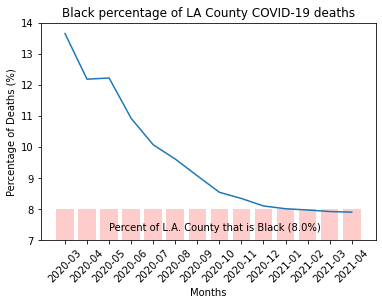

In [223]:
plt.plot(months, percentage_deaths_black_los_angeles)
plt.xticks(rotation=45)
plt.xlabel(xlabel="Months")
plt.ylabel(ylabel="Percentage of Deaths (%)")
plt.ylim([7,14])
plt.text(2, 7.3, f"Percent of L.A. County that is Black ({la_percent_black}%)", color='black')
plt.title(label="Black percentage of LA County COVID-19 deaths")

plt.bar(x=months, height=[la_percent_black], color="red", alpha=.2)
plt.ylim([7,14])

plt.savefig(fname="test_output/percentage_black_deaths.png")
plt.show()



<ipython-input-64-83452b39af0a>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  la_aian_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
<ipython-input-64-83452b39af0a>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  la_asian_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
<ipython-input-64-83452b39af0a>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  la_black_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
<ipython-input-64-83452b39af0a>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  la_nhopi_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)


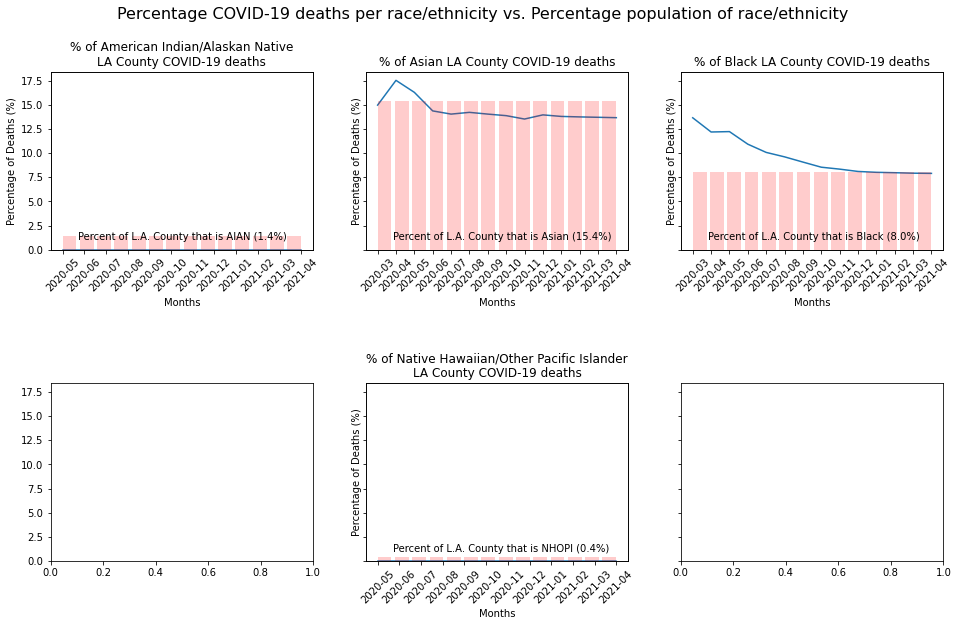

In [64]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(16,9), gridspec_kw={'hspace': .75})

fig.figsize=(15,9)
fig.suptitle("Percentage COVID-19 deaths per race/ethnicity vs. Percentage population of race/ethnicity", size=16)

la_aian_percent_deaths_fig = ax1
la_asian_percent_deaths_fig = ax2
la_black_percent_deaths_fig = ax3
la_hispanic_percent_deaths_fig = ax4
la_nhopi_percent_deaths_fig = ax5
la_white_percent_deaths_fig = ax6

# Subplot showing percentage of COVID-19 deaths that are AIAN patients and AIAN Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are AIAN patients
la_aian_percent_deaths_fig.set_title("% of American Indian/Alaskan Native\nLA County COVID-19 deaths")
la_aian_percent_deaths_fig.plot(months, percentage_deaths_aian_los_angeles)
la_aian_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_aian_percent_deaths_fig.set_xlabel(xlabel="Months")
la_aian_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is AIAN
la_aian_percent_fig = la_aian_percent_deaths_fig.twiny()
la_aian_percent_fig.bar(x=months, height=[la_percent_aian], color="red", alpha=.2)
la_aian_percent_fig.set_xticks([])
la_aian_percent_fig.text(.5, 1, f"Percent of L.A. County that is AIAN ({la_percent_aian}%)", color='black')


# Subplot showing percentage of COVID-19 deaths that are Asian patients and Asian Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are Asian patients
la_asian_percent_deaths_fig.set_title("% of Asian LA County COVID-19 deaths")
la_asian_percent_deaths_fig.plot(months, percentage_deaths_asian_los_angeles)
la_asian_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_asian_percent_deaths_fig.set_xlabel(xlabel="Months")
la_asian_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is Asian
la_asian_percent_fig = la_asian_percent_deaths_fig.twiny()
la_asian_percent_fig.bar(x=months, height=[la_percent_asian], color="red", alpha=.2)
la_asian_percent_fig.set_xticks([])
la_asian_percent_fig.text(.5, 1, f"Percent of L.A. County that is Asian ({la_percent_asian}%)", color='black')


# Subplot showing percentage of COVID-19 deaths that are Black patients and Black Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are Black patients
la_black_percent_deaths_fig.set_title("% of Black LA County COVID-19 deaths")
la_black_percent_deaths_fig.plot(months, percentage_deaths_black_los_angeles)
la_black_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_black_percent_deaths_fig.set_xlabel(xlabel="Months")
la_black_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is Black
la_black_percent_fig = la_black_percent_deaths_fig.twiny()
la_black_percent_fig.bar(x=months, height=[la_percent_black], color="red", alpha=.2)
la_black_percent_fig.set_xticks([])
la_black_percent_fig.text(.5, 1, f"Percent of L.A. County that is Black ({la_percent_black}%)", color='black')


# Subplot showing percentage of COVID-19 deaths that are NHOPI patients and Black Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are NHOPI patients
la_nhopi_percent_deaths_fig.set_title("% of Native Hawaiian/Other Pacific Islander\nLA County COVID-19 deaths")
la_nhopi_percent_deaths_fig.plot(months, percentage_deaths_nhopi_los_angeles)
la_nhopi_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_nhopi_percent_deaths_fig.set_xlabel(xlabel="Months")
la_nhopi_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is NHOPI
la_nhopi_percent_fig = la_nhopi_percent_deaths_fig.twiny()
la_nhopi_percent_fig.bar(x=months, height=[la_percent_nhopi], color="red", alpha=.2)
la_nhopi_percent_fig.set_xticks([])
la_nhopi_percent_fig.text(.5, 1, f"Percent of L.A. County that is NHOPI ({la_percent_nhopi}%)", color='black')


plt.show()


